# ML - Final - 2023

## Instruction

- Modify this file to be Final-<Your Deepali -[]>, e.g., <code>Final-Chaklam-S.ipynb</code>
- This exam is open-booked; open-internet, but no interactions with human beings or ChatGPT.
- The completed exams shall be submitted at the virtual learning environment.
- All code should be **complemented with comments**, unless it's really obvious.  **We reserve the privilege to give you zero for any part of the question where the benefit of doubt is not justified**

# Coding

#### Summary
In this section, you will be dealing with a classification problem. You will be generating your own data, training and evaluating them. You will be asked to create a neural network according to the instructions.

The generating data will be a 2d-data `(28, 28)` being arranged similar to the input shape of `nn.Conv2d` with channel = 1, height = 28 and width = 28 `(batch_size, channel, height, width)`

You will then be asked to create a network consisting of 2 `nn.Conv2d` layers followed by a `nn.Linear` layer. After the `nn.Linear` layer, we send the data to a `nn.LSTM` layer where `num_layer` and `hidden_size` can be defined. This `hidden_size` is set to be the same as `num_classes`. The output of lstm is then directly returned.

Import Libraries

In [1]:
import torch
import torch.nn as nn

1. Generate a 4 class 2d-data with 70000 samples. (10 points)
- Class 0 data is sampled from a normal distribution with mean = 0, std = 1, size = `(28,28)`
- Class 1 data is sampled from a normal distribution with mean = 5, std = 1, size = `(28,28)`
- Class 2 data is sampled from a normal distribution with mean = 15, std = 1, size = `(28,28)`
- Class 3 data is sampled from a normal distribution with mean = 20, std = 1, size = `(28,28)`

The final shape of *x* should be `(70000, 1, 28, 28)` and *y* should be `(70000,)`

In [2]:
import numpy as np
import torch

np.random.seed(42)


def generate_class_data(num_samples, mean, std):
    return np.random.normal(loc=mean, scale=std, size=(num_samples, 28, 28))


num_samples_per_class = 17500  
class_0_data = generate_class_data(num_samples_per_class, 0, 1)
class_1_data = generate_class_data(num_samples_per_class, 5, 1)
class_2_data = generate_class_data(num_samples_per_class, 15, 1)
class_3_data = generate_class_data(num_samples_per_class, 20, 1)

x = np.concatenate([class_0_data, class_1_data, class_2_data, class_3_data], axis=0)
y = np.concatenate([np.zeros(num_samples_per_class),
                    np.ones(num_samples_per_class),
                    2 * np.ones(num_samples_per_class),
                    3 * np.ones(num_samples_per_class)])


shuffle_indices = np.random.permutation(len(x))
x = x[shuffle_indices]
y = y[shuffle_indices]

x_tensor = torch.from_numpy(x).unsqueeze(1).float()
y_tensor = torch.from_numpy(y).long()


print("x shape:", x_tensor.shape)
print("y shape:", y_tensor.shape)


x shape: torch.Size([70000, 1, 28, 28])
y shape: torch.Size([70000])


In case you are unable to do question 1, Use the following lines of code to generate your data and continue with question 3. But be aware that no marks will be given to question 1 and question 2

In [3]:
import torchvision
training_data = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

testing_data  = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

100.0%


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw


100.0%


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw




15.9%

100.0%


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



100.0%

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



2. Split your data into train and test with the split ratio of 1/7 (5 points)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=1/7, random_state=42)



3. Check the size of your train and test sets (5 points)

In [5]:

print("Train set - x shape:", x_train.shape, "y shape:", y_train.shape)
print("Test set - x shape:", x_test.shape, "y shape:", y_test.shape)


Train set - x shape: torch.Size([60000, 1, 28, 28]) y shape: torch.Size([60000])
Test set - x shape: torch.Size([10000, 1, 28, 28]) y shape: torch.Size([10000])


4. Set up your train and test loader with a batch size of 32 and `shuffle = True` (10 points)

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

batch_size = 32


train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


5. Check the shape of your batch. It should be `[batchsize = 32, channel = 1, height = 28, width = 28]` (5 points)

In [7]:

for inputs, labels in train_loader:
    print("Batch Shape:", inputs.shape)
    break 


Batch Shape: torch.Size([32, 1, 28, 28])


6. Plot 6 samples of any classes (10 points)

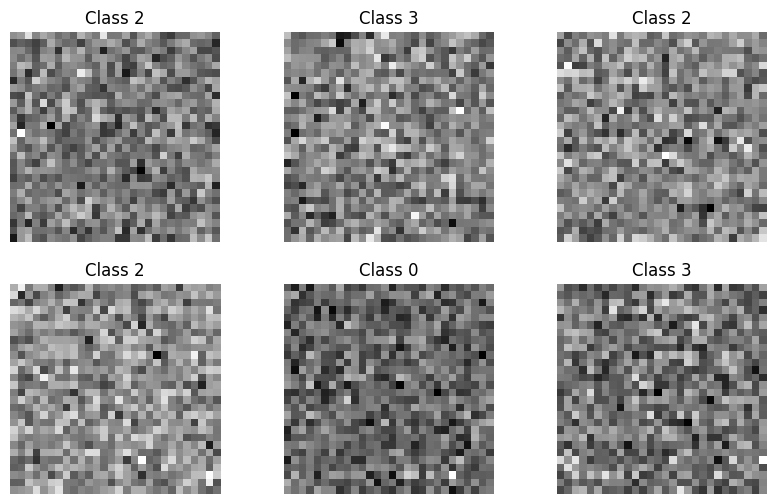

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"{class_names[labels[i].item()]}")
        plt.axis('off')
    plt.show()

class_names = {0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}


for inputs, labels in train_loader:
    plot_samples(inputs, labels, class_names)
    break  


If you use MNIST

7. Configure your device. (5 points)

In [9]:



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the selected device
print("Selected device:", device)


Selected device: cpu


8. Define your class called `Net` with the following layers (40 points)
- cnn2d layer 1 with `in_channel = 1`, `out_channel = 10`, `kernel size = 5`, dropout of `p = 0.5`, `maxpool` and `relu` as its activation function
- cnn2d layer 2 with `in_channel = 10`, `out_channel = 20`, `kernel size = 5`, dropout of `p = 0.5`, `maxpool` and `relu` as its activation function
- linear layer with output of 25
- lstm with `num_layer = 2` and set hidden size to be num_classes




In [26]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()

        # CNN 2D Layer 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.dropout1 = nn.Dropout(p=0.5)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.relu1 = nn.ReLU()

       
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.dropout2 = nn.Dropout(p=0.5)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.relu2 = nn.ReLU()

     
        self.linear = nn.Linear(20 * 4 * 4, 25)

  
        self.lstm = nn.LSTM(input_size=25, hidden_size=num_classes, num_layers=2, batch_first=True)

    def forward(self, x):
       
        x = self.conv1(x)
        x = self.dropout1(x)
        x = self.maxpool1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.dropout2(x)
        x = self.maxpool2(x)
        x = self.relu2(x)

    
        x = x.view(x.size(0), -1)

    
        x = self.linear(x)

 
        x = x.unsqueeze(1)  
        lstm_out, _ = self.lstm(x)

        return lstm_out[:, -1, :]  

9. Create a model object with `num_layers of lstm = 2`, `hidden_size` and `num_classes = 4` (10 points)

If you use MNIST hidden_size and  `num_classes = 10`


In [27]:

num_classes = 4


model = Net(num_classes=num_classes)

print(model)


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (dropout1): Dropout(p=0.5, inplace=False)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (dropout2): Dropout(p=0.5, inplace=False)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu2): ReLU()
  (linear): Linear(in_features=320, out_features=25, bias=True)
  (lstm): LSTM(25, 4, num_layers=2, batch_first=True)
)


10. Define an appropriate loss function for classification of this dataset (2.5 points)

In [28]:
import torch.nn as nn


num_classes = 4  
# Define the CrossEntropyLoss
criterion = nn.CrossEntropyLoss()


criterion = criterion.to(device) 

11. Define your optimizer as `Adam` with learning rate of `0.001` (5 points)

In [31]:
import torch.optim as optim


model = model.to(device)

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)




12. Define your train function and train your model with `n_epoch = 3` (15 points)

In [32]:
def train_with_metrics(model, train_loader, criterion, optimizer, n_epochs, device):
    train_losses = []
    train_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        average_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_samples

        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}")

        train_losses.append(average_loss)
        train_accuracies.append(accuracy)

    return train_losses, train_accuracies


In [33]:
n_epochs = 3
train_losses, train_accuracies = train_with_metrics(model, train_loader, criterion, optimizer, n_epochs, device)


Epoch 1/3, Loss: 1.1183, Accuracy: 0.4954
Epoch 2/3, Loss: 1.0190, Accuracy: 0.4992
Epoch 3/3, Loss: 1.0075, Accuracy: 0.5010


13. Plot your train losses and accuracies (10 points)

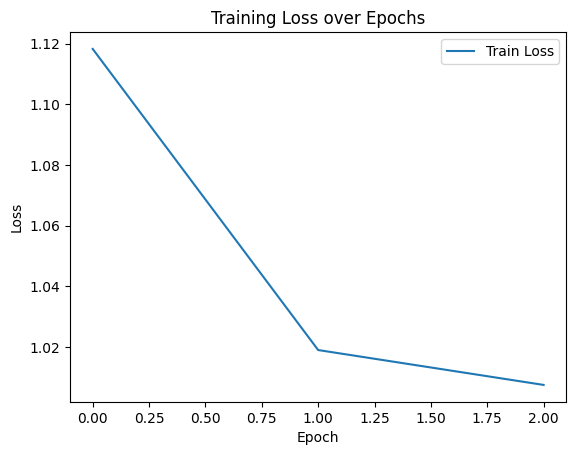

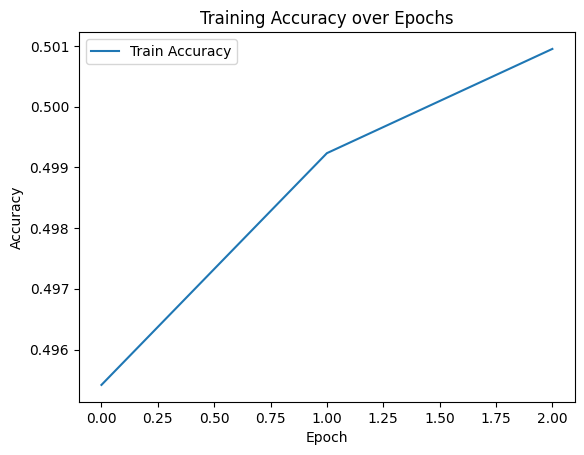

In [34]:
#Plot the train losses
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plot the train accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

14. Evaluate your model with your test set (10 points)

In [35]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


def evaluate(model, test_loader, criterion, device):
    model.eval()  
    total_loss = 0.0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

         
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            
            probabilities = torch.softmax(outputs, dim=1)

            _, predicted = torch.max(probabilities, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    average_loss = total_loss / len(test_loader)

    return average_loss, all_labels, all_predictions

test_loss, test_labels, test_predictions = evaluate(model, test_loader, criterion, device)


test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)


accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

print(f"Test Loss: {test_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Test Loss: 1.0061
Accuracy: 0.4927
Precision: 0.3282
Recall: 0.4927
F1 Score: 0.3685


c:\Users\Deepali Mishra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
